# Sleep Healthcare Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Sleep.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
df.describe


<bound method NDFrame.describe of      Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   Overweight   
1                   6                       60             8       Normal   
2                   6                       60             8       Normal   
3                   4                       30             8        Obese   
4                   4                       30             8        Obese   
..                ...                      ...           ...          ...   
369                 9                       75             3   Overweight   
370                 9                       75             3   Overweight   
371                 9                       75             3   Overweight   
372                 9                       75             3   Overweight   
373                 9                       75             3   Overweight   

    Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0           126/83          77         4200            NaN  
1           125/80          75        10000            NaN  
2           125/80          75        10000            NaN  
3           140/90          85         3000    Sleep Apnea  
4           140/90          85         3000    Sleep Apnea  
..             ...         ...          ...            ...  
369         140/95          68         7000    Sleep Apnea  
370         140/95          68         7000    Sleep Apnea  
371         140/95          68         7000    Sleep Apnea  
372         140/95          68         7000    Sleep Apnea  
373         140/95          68         7000    Sleep Apnea  

[374 rows x 13 columns]>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


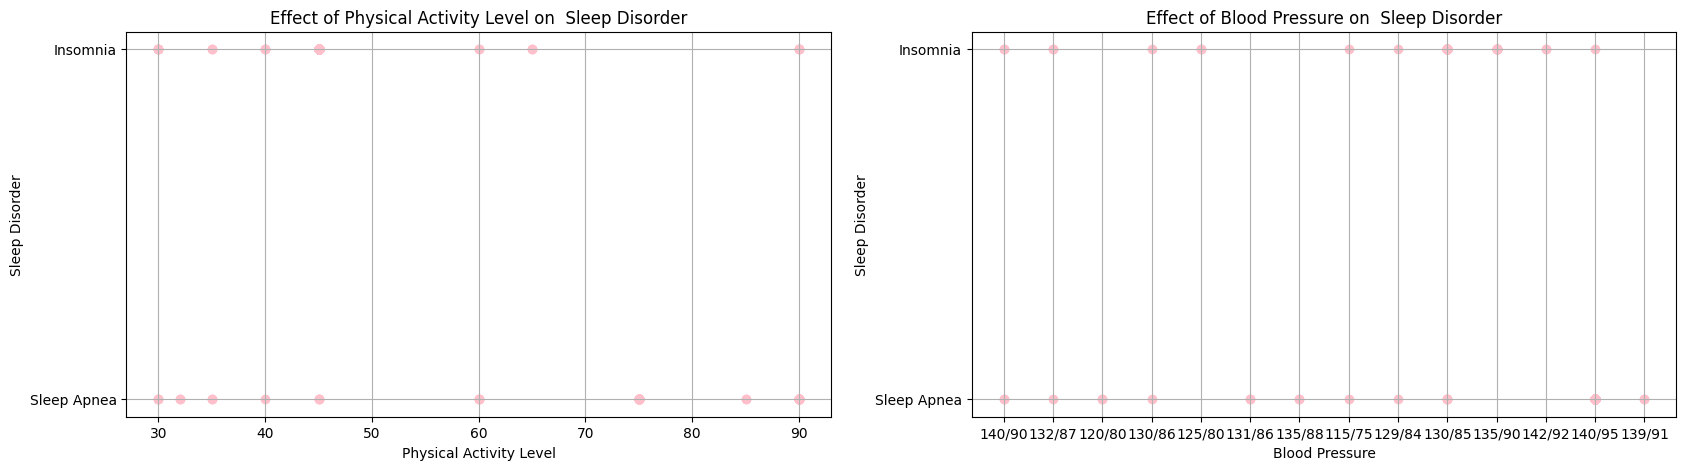

In [ ]:
df = pd.DataFrame(df)
fig, ax = plt.subplots(1,2,figsize =(20,5))

# Filter out rows where 'Sleep Disorder' is NaN before plotting
df_filtered = df.dropna(subset=['Sleep Disorder'])

ax[0].scatter(df_filtered["Physical Activity Level"], df_filtered["Sleep Disorder"],color = "pink", label = "Data Points")
ax[0].set_xlabel("Physical Activity Level")
ax[0].set_ylabel("Sleep Disorder")
ax[0].set_title("Effect of Physical Activity Level on  Sleep Disorder")
ax[0].grid(True)

ax[1].scatter(df_filtered["Blood Pressure"], df_filtered["Sleep Disorder"],color = "pink", label = "Data Points")
ax[1].set_xlabel("Blood Pressure")
ax[1].set_ylabel("Sleep Disorder")
ax[1].set_title("Effect of Blood Pressure on  Sleep Disorder")
ax[1].grid(True)




Text(0.5, 1.0, 'Correlation Heatmap of Factors leading to Sleep disorders')

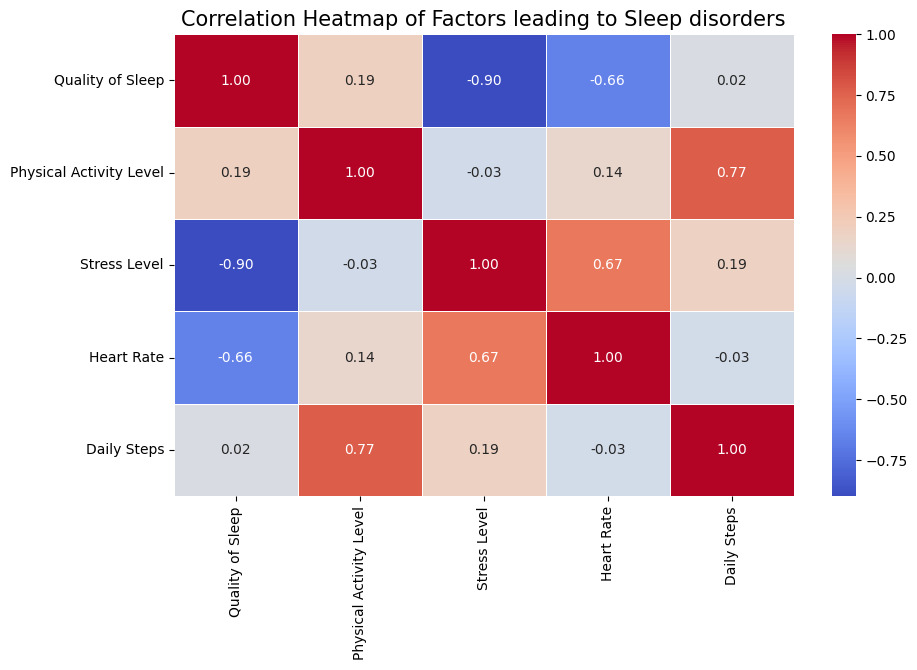

In [ ]:
#Correlation Heat Map
correlation_matrix = df[["Quality of Sleep", "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps"]].corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidth = 0.5)
plt.title("Correlation Heatmap of Factors leading to Sleep disorders", fontsize = 15)

In [ ]:
df.dropna().sum()

,0
Person ID,37938
Gender,MaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleMa...
Age,7228
Occupation,Sales RepresentativeSales RepresentativeSoftwa...
Sleep Duration,1055.9
Quality of Sleep,1065
Physical Activity Level,9439
Stress Level,894
BMI Category,ObeseObeseObeseObeseNormal WeightNormalNormal ...
Blood Pressure,140/90140/90140/90140/90132/87120/80132/87130/...


In [ ]:
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


# Chi2 test to find out the correlation between Sleep  Disorder and Physical Activity

Ho - The  relationship between physical activity and sleep disorder is indifferent

Ha-The relationship between physical activity and sleep disorder is different

In [ ]:
df["Sleep Disorder"].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [ ]:
df["Physical Activity Level"].unique()

array([42, 60, 30, 40, 75, 35, 45, 50, 32, 70, 80, 55, 90, 47, 65, 85])

In [ ]:
data_table = pd.crosstab(df["Sleep Disorder"], df["Physical Activity Level"])
data_table

Physical Activity Level,30,32,35,40,45,60,65,75,85,90
Sleep Disorder,,,,,,,,,,
Insomnia,5,0,2,3,59,2,2,0,0,4
Sleep Apnea,3,2,2,1,3,4,0,31,2,30


In [ ]:
observed_values = data_table.values
observed_values

array([[ 5,  0,  2,  3, 59,  2,  2,  0,  0,  4],
       [ 3,  2,  2,  1,  3,  4,  0, 31,  2, 30]])

In [ ]:
import scipy.stats as stats
expected_values = stats.chi2_contingency(observed_values)
expected_values


Chi2ContingencyResult(statistic=np.float64(109.62777622704094), pvalue=np.float64(1.7506732643748518e-19), dof=9, expected_freq=array([[ 3.97419355,  0.99354839,  1.98709677,  1.98709677, 30.8       ,
         2.98064516,  0.99354839, 15.4       ,  0.99354839, 16.89032258],
       [ 4.02580645,  1.00645161,  2.01290323,  2.01290323, 31.2       ,
         3.01935484,  1.00645161, 15.6       ,  1.00645161, 17.10967742]]))

In [ ]:
stats_test, p, dof,expected_values = stats.chi2_contingency(observed_values)
expected_values


array([[ 3.97419355,  0.99354839,  1.98709677,  1.98709677, 30.8       ,
         2.98064516,  0.99354839, 15.4       ,  0.99354839, 16.89032258],
       [ 4.02580645,  1.00645161,  2.01290323,  2.01290323, 31.2       ,
         3.01935484,  1.00645161, 15.6       ,  1.00645161, 17.10967742]])

In [ ]:
from scipy.stats import chi2
for i in zip(observed_values,expected_values):
  print(i)

(array([ 5,  0,  2,  3, 59,  2,  2,  0,  0,  4]), array([ 3.97419355,  0.99354839,  1.98709677,  1.98709677, 30.8       ,
        2.98064516,  0.99354839, 15.4       ,  0.99354839, 16.89032258]))
(array([ 3,  2,  2,  1,  3,  4,  0, 31,  2, 30]), array([ 4.02580645,  1.00645161,  2.01290323,  2.01290323, 31.2       ,
        3.01935484,  1.00645161, 15.6       ,  1.00645161, 17.10967742]))


In [ ]:
chi2_test = [(o-e)**2/e for o, e in zip(observed_values, expected_values)]
chi2_test

[array([2.64777964e-01, 9.93548387e-01, 8.37871806e-05, 5.16317553e-01,
        2.58194805e+01, 3.22636503e-01, 1.01952241e+00, 1.54000000e+01,
        9.93548387e-01, 9.83761059e+00]),
 array([2.61383375e-01, 9.80810587e-01, 8.27129859e-05, 5.09698098e-01,
        2.54884615e+01, 3.18500138e-01, 1.00645161e+00, 1.52025641e+01,
        9.80810587e-01, 9.71148737e+00])]

In [ ]:
chi2_test_stats = chi2_test[0]  + chi2_test[1]
chi2_test_stats

array([5.26161339e-01, 1.97435897e+00, 1.66500167e-04, 1.02601565e+00,
       5.13079421e+01, 6.41136641e-01, 2.02597403e+00, 3.06025641e+01,
       1.97435897e+00, 1.95490980e+01])

In [ ]:
alpha = 0.05

In [ ]:
dof  = 9

In [ ]:
chi2_critical= chi2.ppf(1-alpha, dof)
chi2_critical

np.float64(16.918977604620448)

In [ ]:
stats_test

np.float64(109.62777622704094)

In [ ]:
if stats_test >= chi2_critical :
  print("Reject Null Hypothesis")
else:
  print("Accept Null Hypothesis")

Reject Null Hypothesis
